In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
data=pd.read_csv(r"Mall_Customers.csv",index_col=0,header=0)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [16]:
data.shape

(200, 4)

In [17]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [18]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
# create x only as no y

In [20]:
x=data.values[:,[2,3]]

In [21]:
x

array([[15, 39],
       [15, 81],
       [16, 6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18, 6],
       [18, 94],
       [19, 3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98],
       [24, 35],
       [24, 73],
       [25, 5],
       [25, 73],
       [28, 14],
       [28, 82],
       [28, 32],
       [28, 61],
       [29, 31],
       [29, 87],
       [30, 4],
       [30, 73],
       [33, 4],
       [33, 92],
       [33, 14],
       [33, 81],
       [34, 17],
       [34, 73],
       [37, 26],
       [37, 75],
       [38, 35],
       [38, 92],
       [39, 36],
       [39, 61],
       [39, 28],
       [39, 65],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
   

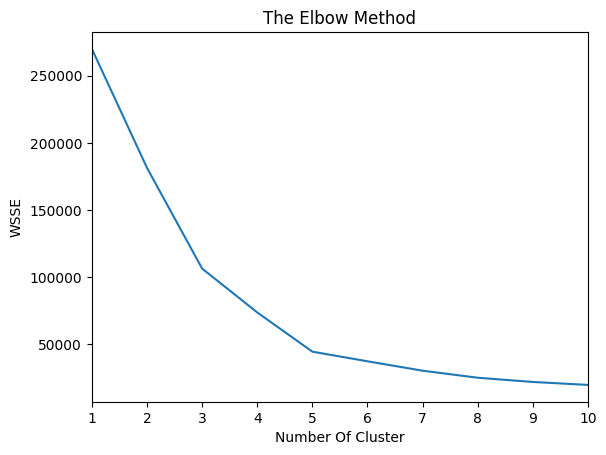

In [22]:
# using thr elbow method to find the optional number of cluster
from sklearn.cluster import KMeans

wsse=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=10)
    kmeans.fit(x)
    wsse.append(kmeans.inertia_)
plt.plot(range(1,11),wsse)
#plt.scatter(range(1,11),wsse)
plt.title("The Elbow Method")
plt.xlim(1,10)
plt.xlabel("Number Of Cluster")
plt.ylabel("WSSE")
plt.show()

In [23]:
print(wsse)

[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37271.8862365895, 30273.394312070042, 25022.48500453035, 21881.878507060967, 19669.71099830122]


In [24]:
# fitting K MEANS TO DATA SER

In [25]:
kmeans=KMeans(n_clusters=5, random_state=10)
Y_pred=kmeans.fit_predict(x)
# IT MEANS .FIT(X) -----> TRAIN
# Y_pred=kmeans.predict(x)------. preciting

In [26]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

# allocating clusters number to observation

In [27]:
data["Clusters"]=Y_pred
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
...,...,...,...,...,...
196,Female,35,120,79,2
197,Female,45,126,28,4
198,Male,32,126,74,2


In [28]:
kmeans.inertia_

44448.45544793371

In [29]:
kmeans.n_iter_

5

In [30]:
kmeans=KMeans(n_clusters=3, random_state=10)
Y_pred=kmeans.fit_predict(x)
# IT MEANS .FIT(X) -----> TRAIN
# Y_pred=kmeans.predict(x)------. preciting

In [31]:
kmeans.inertia_

106348.37306211118

In [32]:
kmeans.n_iter_

14

In [33]:
kmeans=KMeans(n_clusters=5, random_state=10)
Y_pred=kmeans.fit_predict(x)
# IT MEANS .FIT(X) -----> TRAIN
# Y_pred=kmeans.predict(x)------. preciting

In [34]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [35]:
data["Clusters"]=Y_pred
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
...,...,...,...,...,...
196,Female,35,120,79,2
197,Female,45,126,28,4
198,Male,32,126,74,2


In [36]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

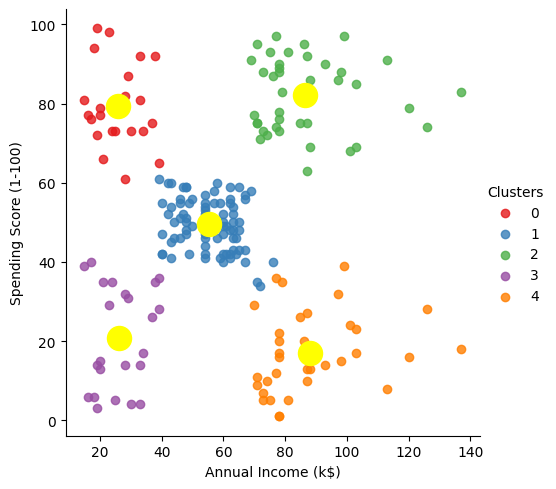

In [37]:
 sns.lmplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, #no regression line
           hue='Clusters', palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s=300, c='yellow')
plt.show()

In [35]:
data['Clusters']=data.Clusters.map({1:'Standard',2:'Target',3:'Sensible',0:'Careless',4:'Careful'})


data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,Cluster
CustomerID,,,,,,
1,Male,19,15,39,Sensible,Sensible
2,Male,21,15,81,Careless,Careless
3,Female,20,16,6,Sensible,Sensible
4,Female,23,16,77,Careless,Careless
5,Female,31,17,40,Sensible,Sensible
...,...,...,...,...,...,...
196,Female,35,120,79,Target,Target
197,Female,45,126,28,Careful,Careful
198,Male,32,126,74,Target,Target


In [36]:
# giving client info

In [37]:
new_data=data[data['Clusters']=='Target']

In [38]:
new_data.shape

(39, 6)

In [39]:
new_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,Cluster
CustomerID,,,,,,
124,Male,39,69,91,Target,Target
126,Female,31,70,77,Target,Target
128,Male,40,71,95,Target,Target
130,Male,38,71,75,Target,Target
132,Male,39,71,75,Target,Target
134,Female,31,72,71,Target,Target
136,Female,29,73,88,Target,Target
138,Male,32,73,73,Target,Target
140,Female,35,74,72,Target,Target


In [40]:
new_data.to_excel(r'TargetCustomers.xlsx',index=True)